## Exploratory Data Analysis of Diwali Sales
Project by- *Prakhyat Wadhwa*

###

In [42]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [45]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [46]:
df.shape

(11251, 15)

In [47]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [49]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [50]:
df.info()
#null values removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [51]:
#check for null values in columns
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [52]:
df.shape

(11251, 13)

In [53]:
# drop null values
# df = df.dropna()
# same as df.dropna(inplace = True) but not good for memory kyuki ab nayi dataframe ke liye memory extra lagegi
# that's why use inplace'
df.dropna(inplace = True)

In [54]:
df.shape

(11239, 13)

In [55]:
# change data type
df['Amount'] =df['Amount'].astype('int')

In [56]:
df['Amount'].dtypes

dtype('int32')

In [57]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [59]:
#rename column, save nahi hoga kyuki inplace use nahi kiya. Just for practice
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [60]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

In [68]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

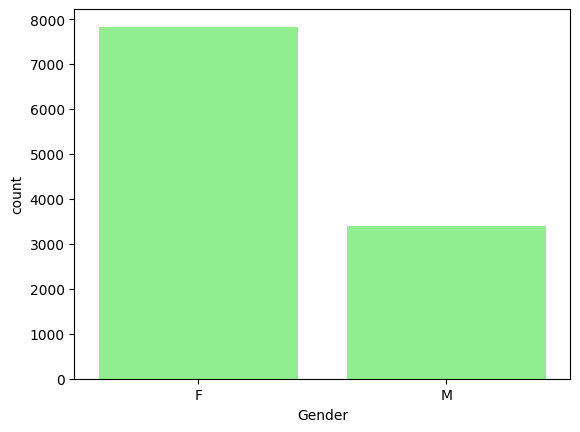

In [77]:
temp = sns.countplot(x = 'Gender', data = df, color = 'lightgreen', saturation = 1.5)

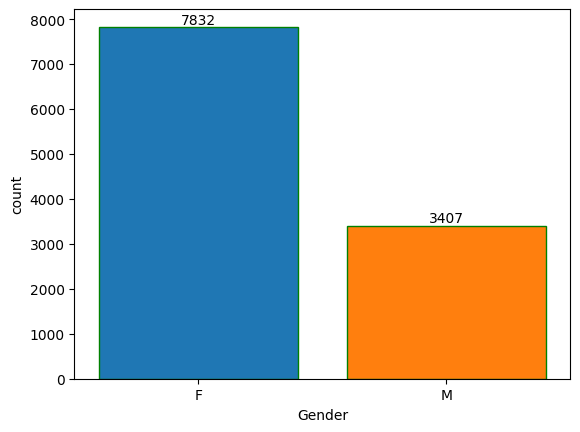

In [122]:
# plotting a bar chart for Gender and it's count

plot = sns.countplot(x = 'Gender',data = df, hue = 'Gender',legend = , saturation = 1.5, edgecolor = 'green')

# for adding labels
for bar in plot.containers:
    plot.bar_label(bar)

In [152]:
# sql jesa group by clause
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending=True)

,Gender,Amount
1,M,31913276
0,F,74335853


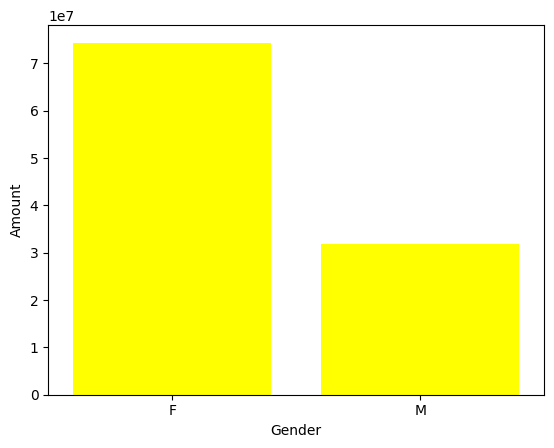

In [124]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

oye = sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, color = 'yellow', saturation = 1)
# for bar in oye.containers:
#     oye.bar_label(bar)

**Summary : More orders given and amount spent by females**

### Age

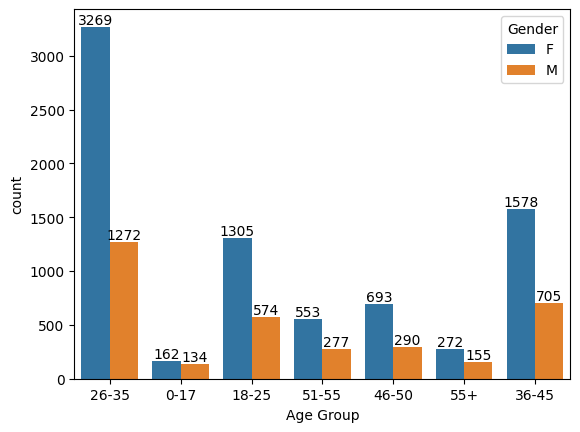

In [127]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

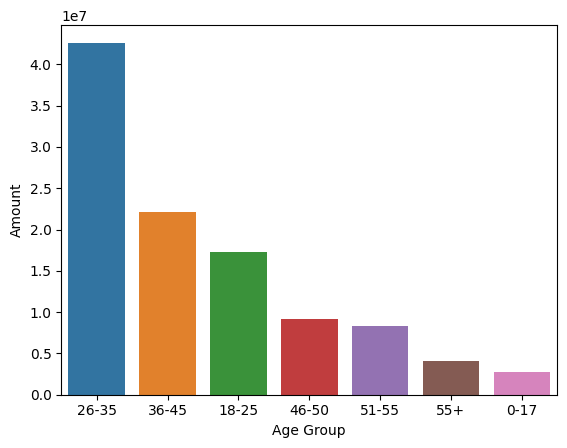

In [133]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, hue = 'Age Group)

**From above graphs we can see that most of the buyers are of age group between 26-35 yrs females**

### State

<Axes: xlabel='State', ylabel='Orders'>

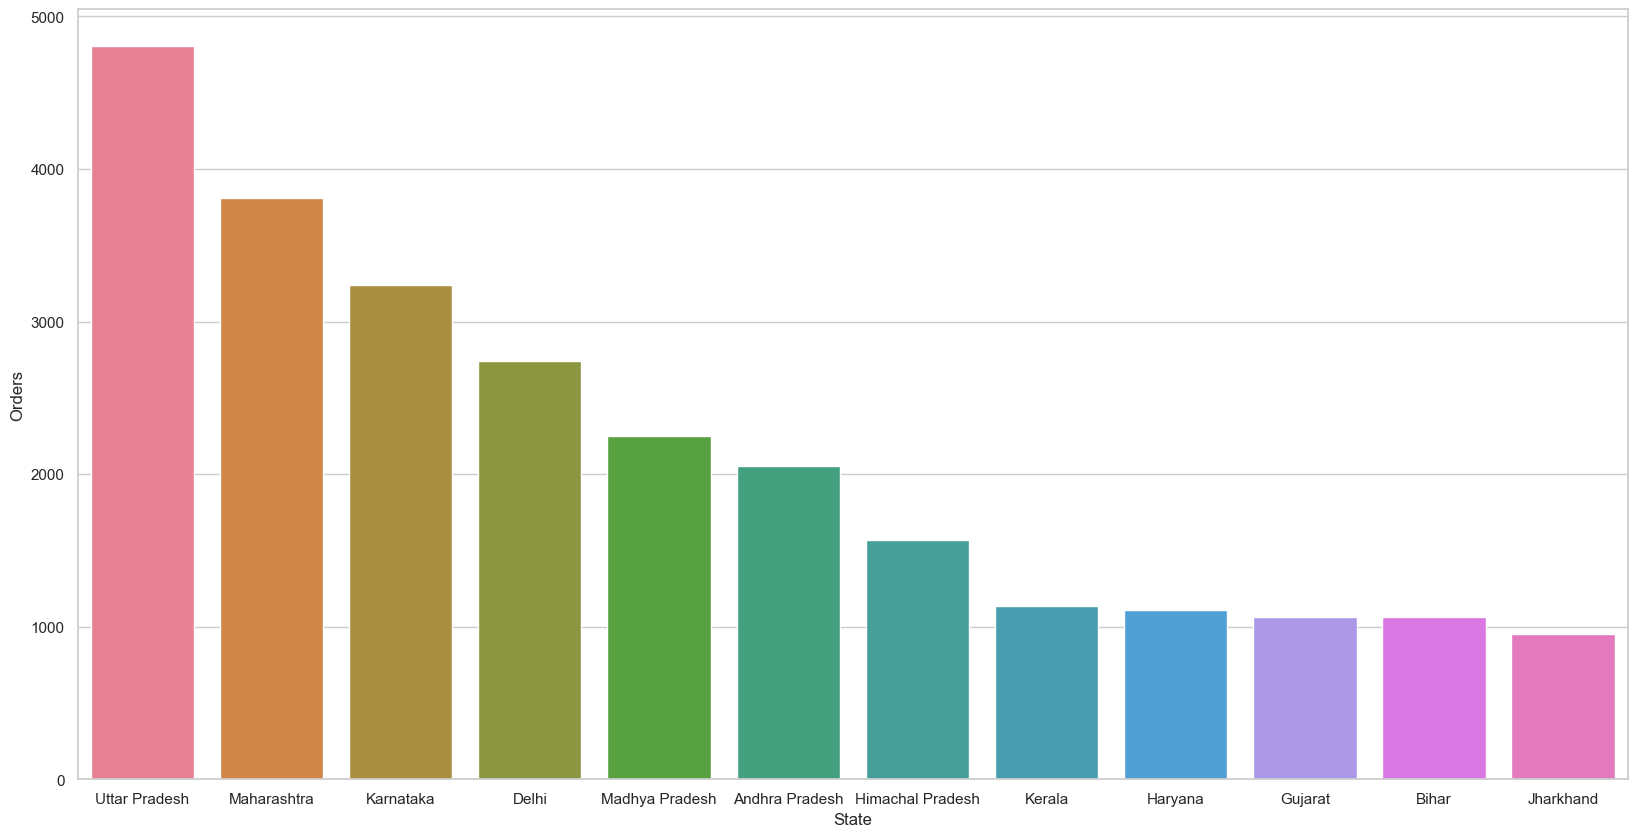

In [166]:
# total number of orders from top 12 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(12)

# resize kar ke width increase karni padi. Labels were not visible
sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

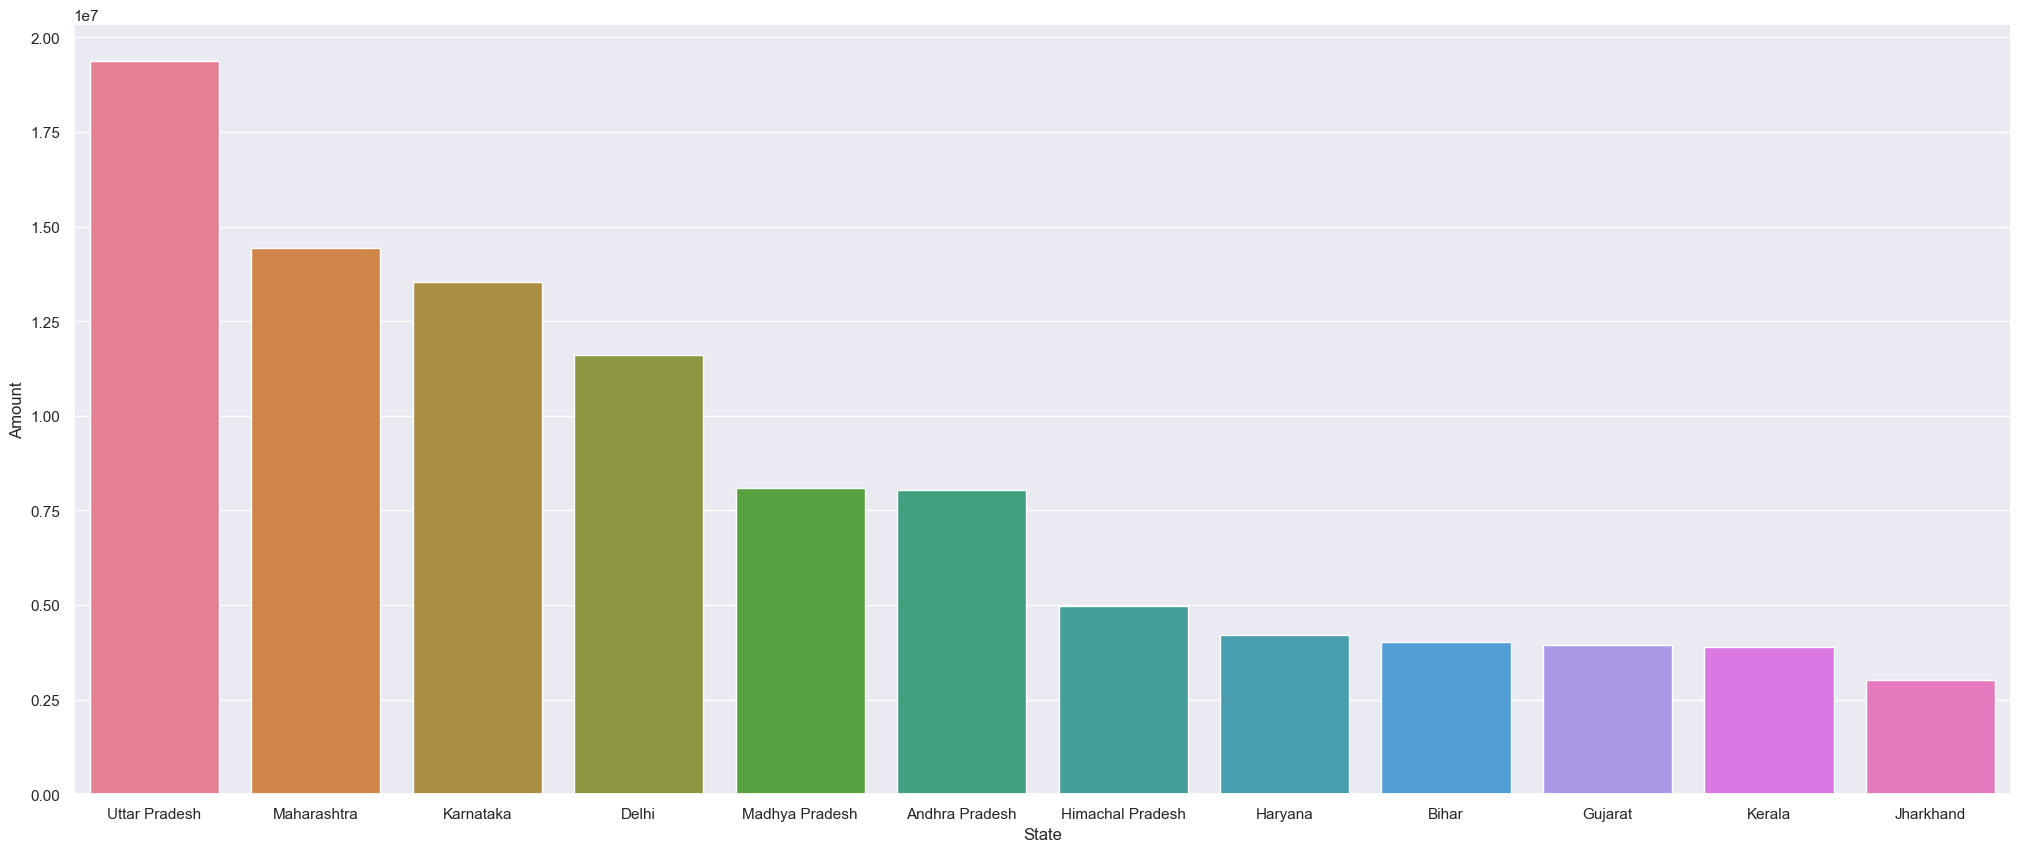

In [175]:
# total amount/sales from top 12 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(12)

sns.set_style('dark')
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue = 'State')

**Most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively**


### Marital Status

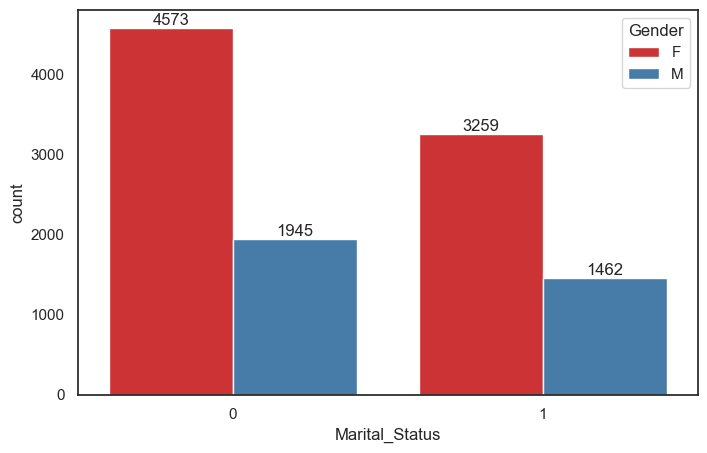

In [181]:
plot = sns.countplot(data = df, x = 'Marital_Status', hue = 'Gender', palette = 'Set1')

sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")
for bar in plot.containers:
    plot.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

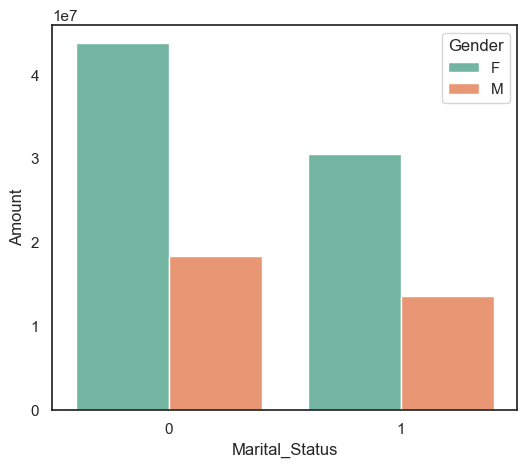

In [184]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.set_style("white")
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender', palette = 'Set2')

**From above graphs we can see that most of the buyers are married (women) and have spent dearly**

### Occupation

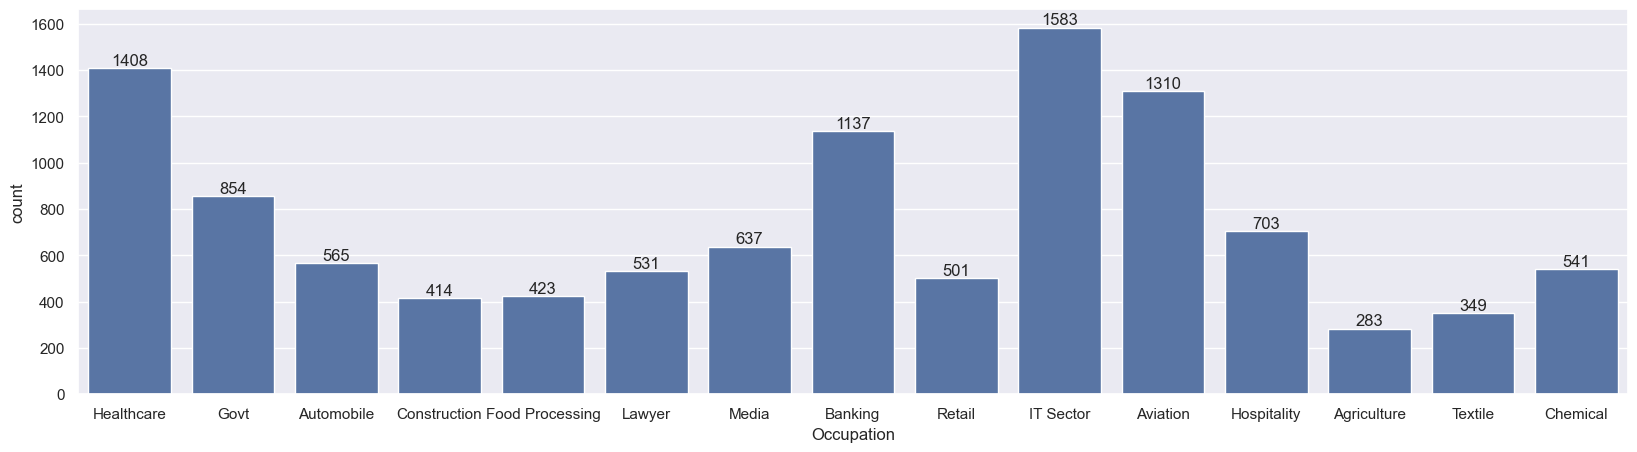

In [187]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

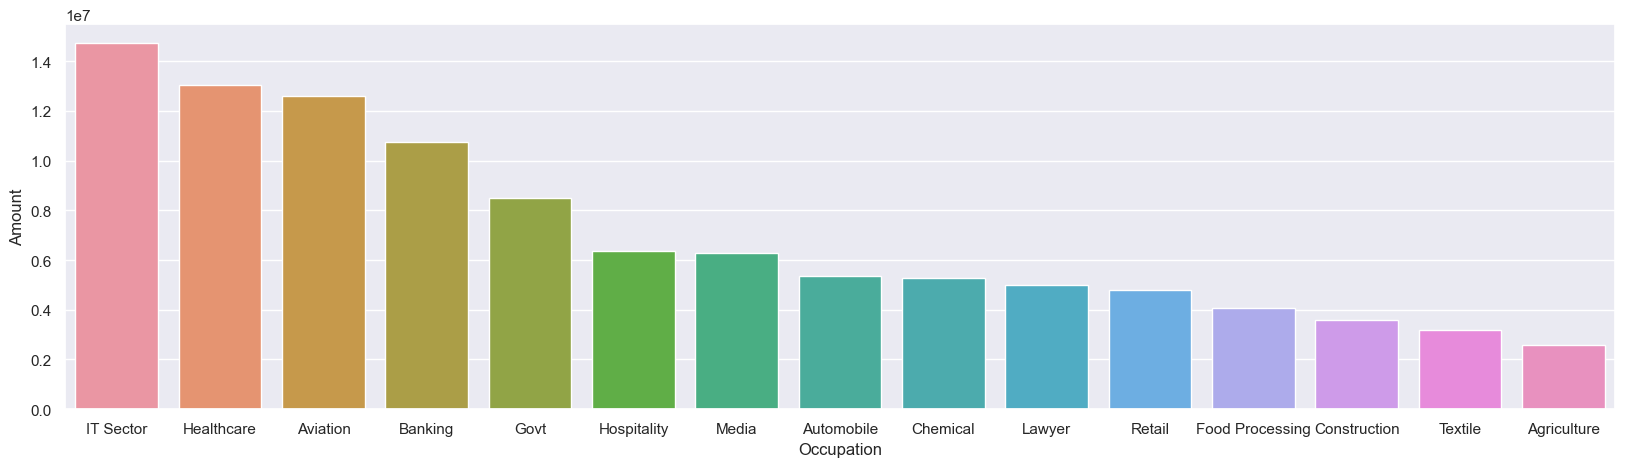

In [24]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

<Axes: xlabel='Product_Category', ylabel='Amount'>

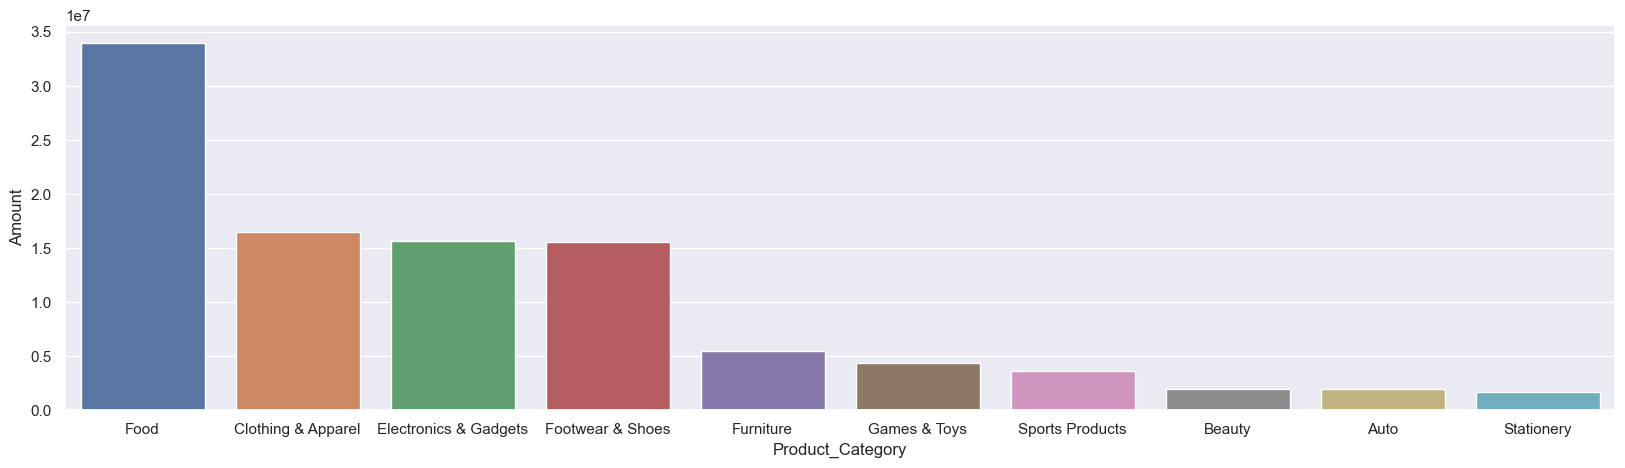

In [26]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

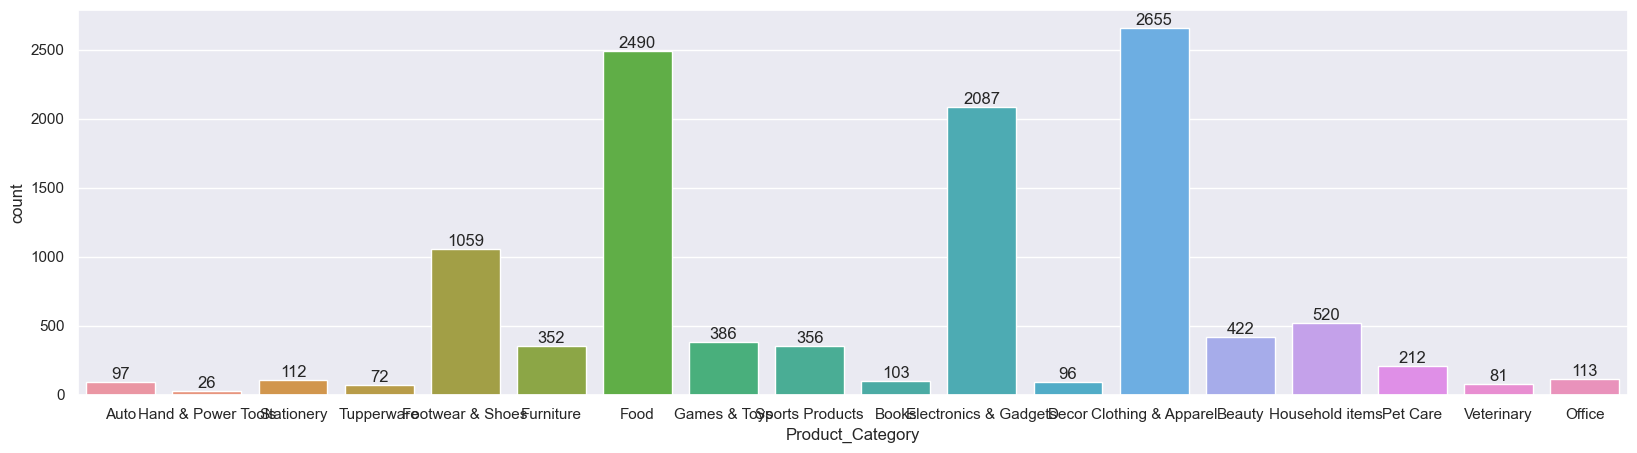

In [25]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

([<matplotlib.patches.Wedge at 0x24d6fa48f90>,
 [Text(0.5651103271616011, 0.9437427181892893, 'Food'),
  Text(-0.9214449568962657, 0.600782149710225, 'Clothing & Apparel'),
  Text(-1.0136245633001149, -0.4272765435577428, 'Electronics & Gadgets'),
  Text(-0.243388142864958, -1.0727358537462737, 'Footwear & Shoes'),
  Text(0.44406488340898626, -1.006382819469293, 'Furniture'),
  Text(0.7191161397434205, -0.8323893185045815, 'Games & Toys'),
  Text(0.8977275843655804, -0.635676949612883, 'Sports Products'),
  Text(0.9923540496901628, -0.47458765266653735, 'Beauty'),
  Text(1.0417041978444266, -0.3533445403473784, 'Auto'),
  Text(1.0743062900101519, -0.23635988501567598, 'Stationery'),
  Text(1.0923593562331675, -0.12942579669393542, 'Household items'),
  Text(1.0993216920569293, -0.038624051743572196, 'Tupperware')],
 [Text(0.3082419966336006, 0.5147687553759759, '33%'),
  Text(-0.5026063401252358, 0.32769935438739545, '16%'),
  Text(-0.5528861254364262, -0.23305993284967785, '15%'),
  T

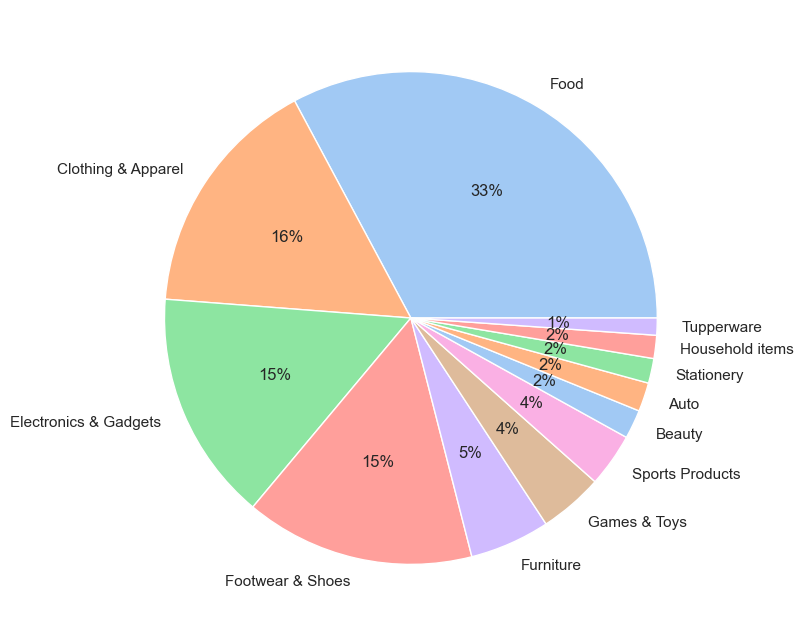

In [247]:
# plotting a pie chart for Gender and it's count

sns.set(rc={'figure.figsize':(8,8)})
temp_data = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = "Amount", ascending = False).head(12)
plt.pie(temp_data['Amount'], labels = temp_data['Product_Category'],colors = sns.color_palette('pastel')[0:7],autopct = '%.0f%%')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

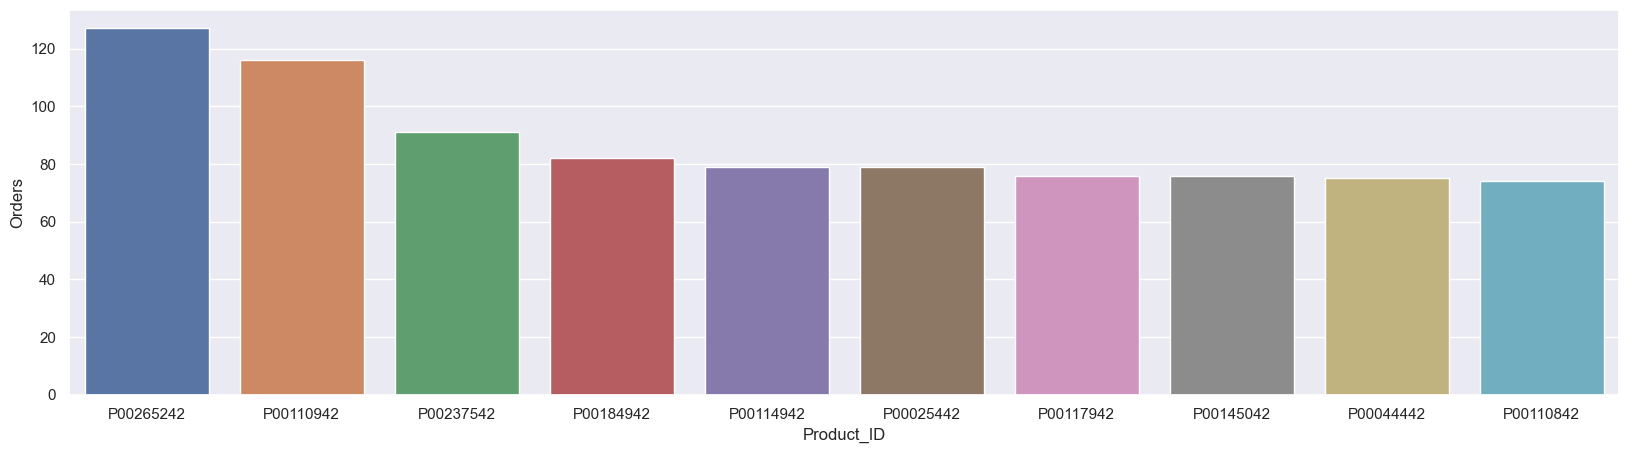

In [27]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

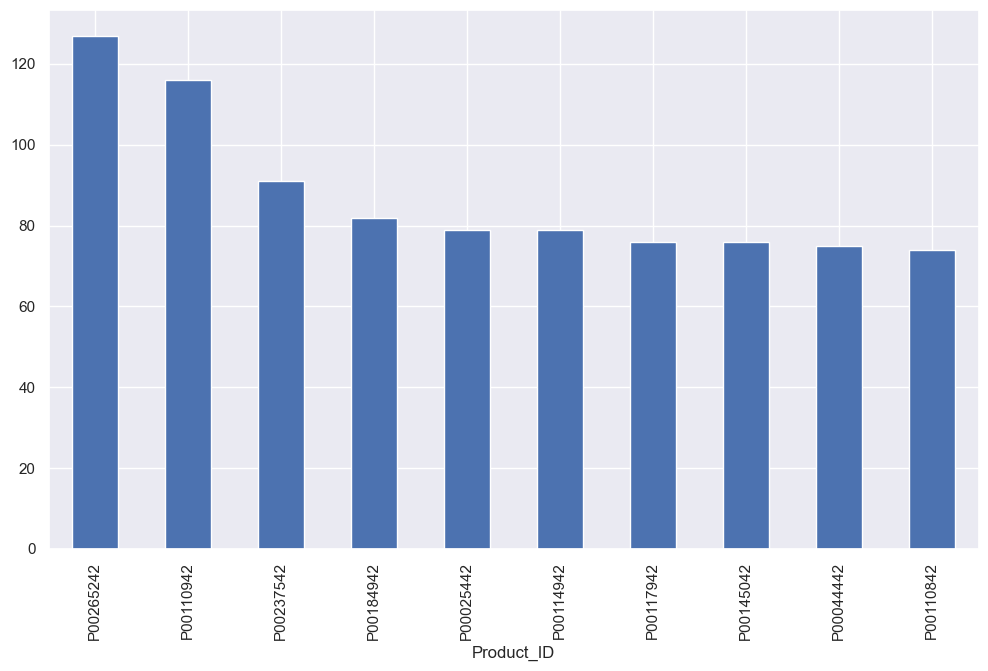

In [271]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

In [250]:
import sqlite3

conn = sqlite3.connect('tester.db')
cur = conn.cursor()
df.to_sql('Diwali_Sales_Data_',conn)

11239

In [251]:
command = pd.read_sql("select Occupation, count(*) as 'Orders' from 'Diwali_Sales_Data_' group by Occupation order by Orders desc",conn)
command

,Occupation,Orders
0,IT Sector,1583
1,Healthcare,1408
2,Aviation,1310
3,Banking,1137
4,Govt,854
5,Hospitality,703
6,Media,637
7,Automobile,565
8,Chemical,541
9,Lawyer,531


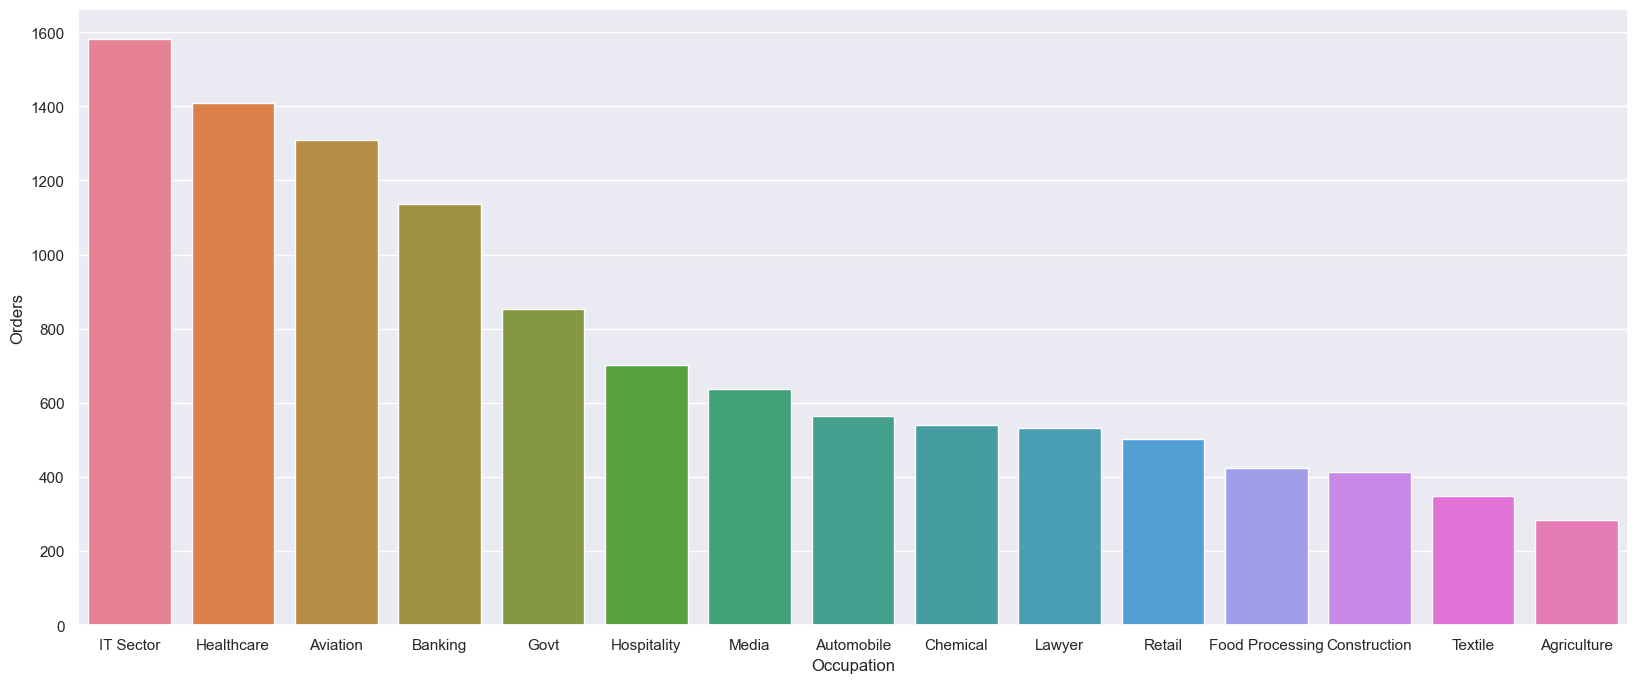

In [270]:
plot = sns.barplot(data = command, x = 'Occupation', y = 'Orders', hue = 'Occupation')
sns.set_style("dark")
sns.set(rc = {'figure.figsize':(15,4)})

## Conclusion:

### 

*Married women aged between 26-35 years from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*

Thank you!